In [ ]:
%load_ext autoreload
%autoreload 2
import bnpm
import bnpm.plotting_helpers
import bnpm.similarity


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_points = 100000  ## Number of points to sample
image_size = (50, 80)  ## Size of the image (height, width)

## Sample points uniformly in the image_size bounds
points = np.random.uniform(low=(0,0), high=image_size, size=(n_points, 2))

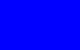

In [30]:
fig, ax = plt.subplots(figsize=(8/2, 5/2))
ax.scatter(points[:, 0], points[:, 1], s=1, c='blue', alpha=0.5)
## remove the axis
ax.axis('off')
# completely remove the frame and border so that the image goes all the way to the edge
ax.spines.clear()
ax.set_xlim(0, image_size[0]), ax.set_ylim(0, image_size[1])
# Set the figure size in inches based on the desired image size and dpi
plt.tight_layout(pad=0)
# Set the figure size to match the image size
fig.set_size_inches(image_size[1] / fig.dpi, image_size[0] / fig.dpi)
fig = plt.gcf()
fig.canvas.draw()

# Get the RGB buffer
image_scatter_plot = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image_scatter_plot = image_scatter_plot.reshape(fig.canvas.get_width_height()[::-1] + (4,))[:, :, :3]

Button(description='Confirm ROI', style=ButtonStyle())

Button(description='New ROI', style=ButtonStyle())

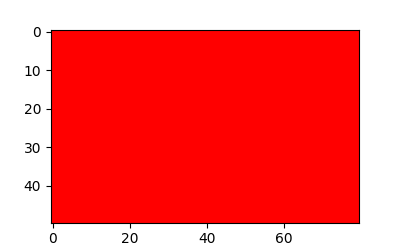

In [ ]:
roi = bnpm.plotting_helpers.Select_ROI(
    image=image_scatter_plot,
    kwargs_polyline={
        'color': (0,0,0),
    },
    kwargs_subplots={
        'figsize': (8/2, 5/2),  # Adjust the size to match the image aspect ratio
    },
)

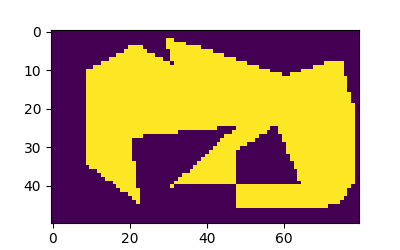

In [32]:
plt.figure(figsize=(8/2, 5/2))
plt.imshow(roi.mask_frames[0])

In [34]:
points.shape, np.array(roi.selected_points[0]).shape

((100000, 2), (21, 2))

In [ ]:
d = bnpm.similarity.point_to_roi_distance(
    query_coords=points,
    roi_coords=np.array(roi.selected_points[0])[:, ::-1],
)

/var/folders/rj/y1_9lfn16mg3r0j3qg45dxw40000gn/T/ipykernel_79335/1113115616.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8/2, 5/2))


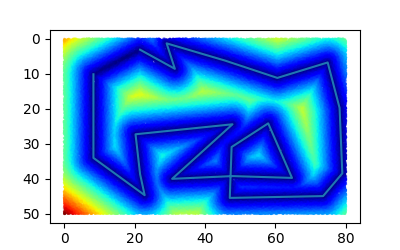

In [38]:
plt.figure(figsize=(8/2, 5/2))
plt.scatter(points[:, 1], points[:, 0], s=1, c=d, cmap='jet', alpha=0.5,)
plt.plot(np.array(roi.selected_points[0])[:, 0], np.array(roi.selected_points[0])[:, 1])
## make top left origin
plt.gca().invert_yaxis()